In [51]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Importing all the required libraies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [53]:
# Importing the dataset 
original_data = pd.read_csv('C:/Users/sowmya.krishnan/Downloads/Country-data.csv')

UNDERSTANDING THE DATA 

In [54]:
original_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [55]:
original_data.shape

(167, 10)

In [56]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Gross Domestic Product (GDP) is the monetary value of all finished goods and services made within a country during a specific period & provides an economic snapshot of a country, used to estimate the size of an economy and growth rate.

While looking at the forst few rpws of data we can see similarities in the imports and exports percentages of some countries, whose GDP otherwise differ significantly from each other. To get an exact idea of the economic size of a country, we should convert the percentage values to absolute GDP per capita values. 

In [57]:
original_data['exports'] = original_data['exports']*original_data['gdpp']/100
original_data['imports'] = original_data['imports']*original_data['gdpp']/100
original_data['health'] = original_data['health']*original_data['gdpp']/100

In [58]:
original_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


DATA CLEANING

In [14]:
#checking for duplicates 
original_data.duplicated(subset = ['country'], keep = False).sum()

0

In [15]:
#checking for null values 
original_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [18]:
#checking for column wise unique values 
unique_value =original_data.nunique()
unique_value = unique_value[unique_value.values ==1]
unique_value

Series([], dtype: int64)

In [19]:
#We can check for spelling mistakes in the country column
print(original_data['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

A quick scan through the data shows no major spelling mistakes w.r.t the countries.

OUTLIER ANALYSIS 

In [20]:
original_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1daccc51160>,
 'caps': [<matplotlib.lines.Line2D at 0x1daccf16ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daccf167f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1daccf32828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daccf32b70>],
 'means': []}

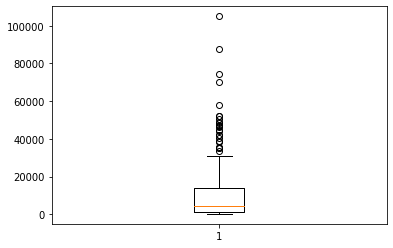

In [21]:
plt.boxplot(original_data.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1daccfbb908>,
 'caps': [<matplotlib.lines.Line2D at 0x1daccfbbda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daccfbb518>],
 'medians': [<matplotlib.lines.Line2D at 0x1daccfc66d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1daccfc6a20>],
 'means': []}

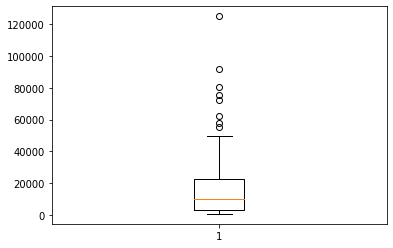

In [22]:
plt.boxplot(original_data.income)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001DACD01CD30>, <matplotlib.lines.Line2D object at 0x000001DACD01CE10>], 'caps': [<matplotlib.lines.Line2D object at 0x000001DACD02A400>, <matplotlib.lines.Line2D object at 0x000001DACD02A748>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001DACD01C940>], 'medians': [<matplotlib.lines.Line2D object at 0x000001DACD02AA90>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001DACD02ADD8>], 'means': []}


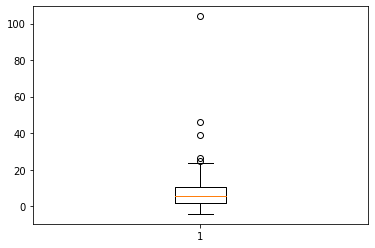

In [23]:
print(plt.boxplot(original_data.inflation))

An analysis of the above boxplots reveal that gdp, income and inflation columns have significant outliers. 

Performing PCA on the data 

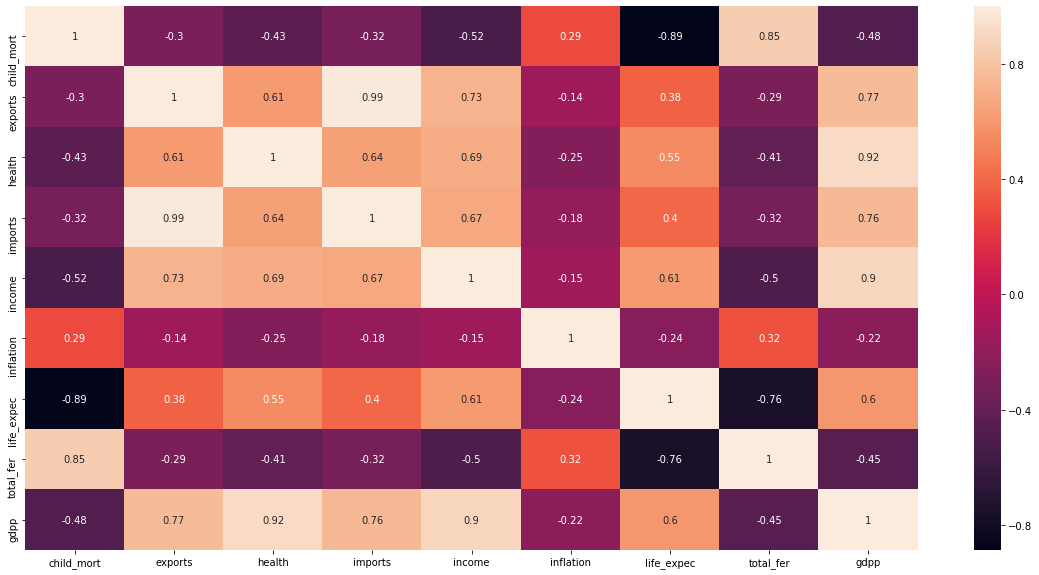

In [131]:
plt.figure(figsize = (20,10))        
sns.heatmap(original_data.corr(),annot = True)

Analysing the correlation matrix is a useful default method because it takes the standardized form of the matrix; therefore, if variables have been measured using different scales this will not affect the analysis. Often you will want to analyse variables that use different measurement scales. Analysing the correlation matrix ensures that differences in measurement scales are accounted for. 

In this case, we see most of the variables are highly corrleated and hence PCA can be performed on this data. 

In [133]:
first_data=original_data.drop(['country'],axis=1)
first_data.head()  

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [134]:
# Re-scaling the data to standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(first_data)

In [135]:
first_data 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
1,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840


In [32]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [62]:
#Doing the PCA on the data
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [63]:
pca.components_

array([[-0.32797786,  0.33916924,  0.3336202 ,  0.34538444,  0.38579085,
        -0.13597407,  0.35109525, -0.31811331,  0.39371871],
       [ 0.47332822,  0.41143247,  0.1149049 ,  0.37103347,  0.185648  ,
         0.2468052 , -0.35343546,  0.44453974,  0.19469097],
       [-0.16799894, -0.0336416 , -0.09978455, -0.09570696,  0.13329091,
         0.93884331,  0.21000085, -0.09029083, -0.0090445 ],
       [-0.13532508,  0.42831943, -0.67584401,  0.40503999, -0.07365024,
        -0.05425296,  0.02206267, -0.17453626, -0.37160417],
       [ 0.18646267, -0.04389298, -0.07038176, -0.14705219,  0.32652689,
         0.03322894, -0.60336184, -0.67898515,  0.06274414],
       [-0.03453879, -0.04137691, -0.43297879, -0.35574866,  0.71039227,
        -0.18430795,  0.12398613,  0.34636636,  0.09538587],
       [-0.76494723,  0.01724219,  0.08188234,  0.02627288, -0.00423393,
         0.03074221, -0.57126548,  0.28247752,  0.00791528],
       [ 0.01965354,  0.12132096,  0.45286284, -0.03635159,  0

In [64]:
#Checking the variance ratios
pca.explained_variance_ratio_

array([0.59447198, 0.16160401, 0.10121329, 0.08061451, 0.02641285,
       0.0232014 , 0.0097043 , 0.0021116 , 0.00066606])

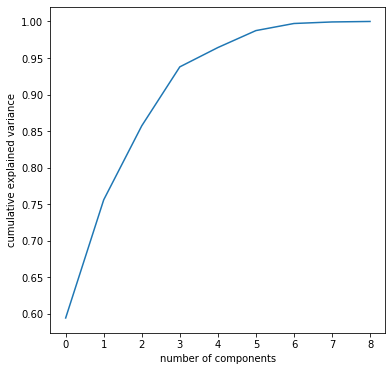

In [65]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

About 90% of the data is being explained by three components. Next step would be to analyze the first three components and to decide whether it makes sense to use only them for clustering.

In [66]:
colnames = list(original_data.drop('country',axis=1).columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df 

,Feature,PC1,PC2,PC3
0,child_mort,-0.327978,0.473328,-0.167999
1,exports,0.339169,0.411432,-0.033642
2,health,0.333620,0.114905,-0.099785
3,imports,0.345384,0.371033,-0.095707
4,income,0.385791,0.185648,0.133291
5,inflation,-0.135974,0.246805,0.938843
6,life_expec,0.351095,-0.353435,0.210001
7,total_fer,-0.318113,0.444540,-0.090291
8,gdpp,0.393719,0.194691,-0.009044


Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples.

In [67]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [68]:
pca_df = pca_final.fit_transform(scaled_data)
pca_df.shape

(158, 3)


Creating a transpose so that the each column is properly arranged

In [49]:
pc = np.transpose(pca_df)
pc

array([[-2.72602246e+00,  9.93638362e-02, -3.21839093e-01,
        -2.69238067e+00,  1.08385455e+00,  3.12989825e-01,
        -2.62904185e-01,  5.53025288e+00, -2.80246837e-01,
         2.33427291e+00,  2.33238069e+00, -1.04574456e+00,
         1.34577832e+00,  2.37128274e-01,  5.96978643e+00,
        -2.78893212e-01, -2.45148696e+00, -6.66162118e-01,
        -9.99626790e-01,  4.04169566e-01, -9.44867943e-01,
         4.07022106e-01,  4.06630659e+00,  5.31015048e-01,
        -2.85047317e+00, -2.86390049e+00, -1.21115213e+00,
        -2.51458004e+00,  4.80459375e+00, -4.57638335e-01,
        -3.36652998e+00, -3.28745608e+00,  1.09501278e+00,
        -2.27270486e-02,  1.22488034e-01, -2.01823791e+00,
        -3.21279227e+00, -2.00640324e+00,  6.90640472e-01,
        -2.64013996e+00,  1.27450802e+00,  3.42366967e+00,
         2.49674435e+00, -2.37262331e-01, -1.85269448e-01,
        -7.86496031e-01, -2.69209145e-01, -3.36576118e-01,
        -2.01704287e+00,  1.69291006e+00, -6.66599544e-0

In [136]:
rownames = list(original_data['country'])

In [137]:
rownames

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Ita

In [140]:
pca_2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pca_2.head()

,PC1,PC2,PC3
0,-2.726022,1.212722,-0.585490
1,0.099364,-1.485983,0.090312
2,-0.321839,-0.706127,1.008964
3,-2.692381,2.043793,0.489737
4,1.083855,-0.810973,-0.203004


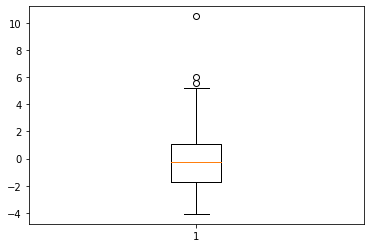

In [79]:
plt.boxplot(pca_2.PC1)
Q1 = pca_2.PC1.quantile(0.05)
Q3 = pca_2.PC1.quantile(0.95)
IQR = Q3 - Q1
pca_2 = pca_2[(pca_2.PC1 >= Q1) & (pca_2.PC1 <= Q3)]

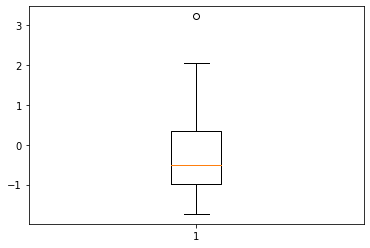

In [80]:
plt.boxplot(pca_2.PC2)
Q1 = pca_2.PC2.quantile(0.05)
Q3 = pca_2.PC2.quantile(0.95)
IQR = Q3 - Q1
pca_2 = pca_2[(pca_2.PC2 >= Q1) & (pca_2.PC2 <= Q3)]

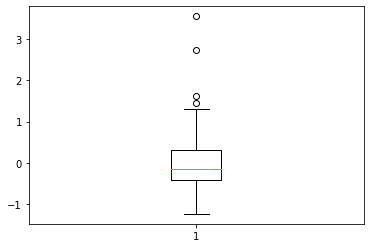

In [81]:
plt.boxplot(pca_2.PC3)
Q1 = pca_2.PC3.quantile(0.05)
Q3 = pca_2.PC3.quantile(0.95)
IQR = Q3 - Q1
new_data = pca_2[(pca_2.PC3 >= Q1 ) & (pca_2.PC3 <= Q3)]

In [82]:
pca_2.shape

(126, 3)

HOPKINS STATISTICS

In [83]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [84]:
hopkins(pca_2)

0.7842870220654392

Since the value is > 0.7 the given dataset has a good tendency to form clusters.

K-Means clustering

Silhoutte Analysis

In [85]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pca_2)
    sse_.append([k, silhouette_score(pca_2, kmeans.labels_)])

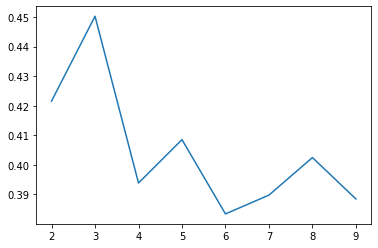

In [86]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

Our earlier value of 3 for the number of clusters may not be optimal. Uisng the elbow curve method to check for the same. 

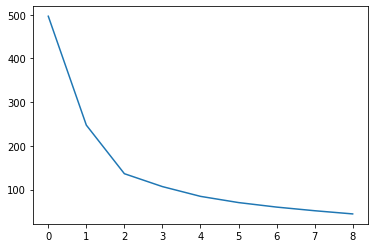

In [87]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

By looking silhouette analysis and in sum of squared distances graph , we see that the elbow is in the range of 3 to 5 , so let us take k as 5. 

In [196]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pca_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [197]:
df_km = pca_2
df_km.index = pd.RangeIndex(len(df_km.index))
dat_km = pd.concat([df_km, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,PC1,PC2,PC3,ClusterID
0,-2.726022,1.212722,-0.585490,1
1,0.099364,-1.485983,0.090312,2
2,-0.321839,-0.706127,1.008964,2
3,-2.692381,2.043793,0.489737,1
4,1.083855,-0.810973,-0.203004,2


In [198]:
dat_km['ClusterID'].value_counts()

2    82
1    46
0    28
4     1
3     1
Name: ClusterID, dtype: int64

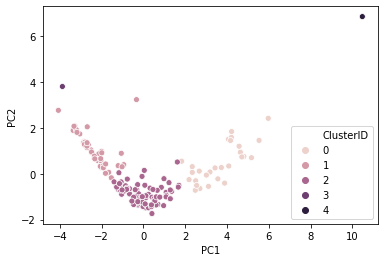

In [200]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

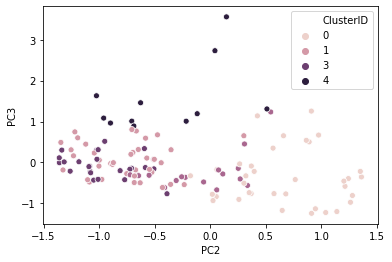

In [116]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km)

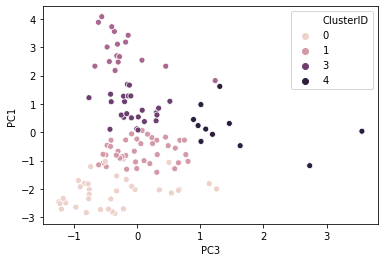

In [117]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km)

In [194]:
country_merge_km=pd.merge(original_data,dat_km,left_index=True,right_index=True )
country_merge_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.726022,1.212722,-0.585490,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.321839,-0.706127,1.008964,4
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.083855,-0.810973,-0.203004,3
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.312990,-0.626827,1.458603,4
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,-0.280247,-0.474651,0.673930,1


In [195]:
country_merge_km[country_merge_km['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,-2.726022,1.212722,-0.585490,0
11,Bahrain,8.6,14386.5000,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,-2.451487,0.911686,-1.246153,0
14,Belarus,5.5,3099.4200,338.2830,3889.350,16200,15.100,70.4,1.49,6030,-0.944868,0.395366,-0.220339,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,-2.863900,1.360587,-0.356504,0
19,Bolivia,46.6,815.7600,95.8320,679.140,5410,8.780,71.6,3.20,1980,-2.514580,1.039162,-1.227144,0
23,Brunei,10.5,23792.2000,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,-2.018238,0.368291,-0.763026,0
24,Bulgaria,10.8,3433.6800,469.9080,3625.200,15300,1.110,73.9,1.57,6840,-2.006403,0.974907,0.668384,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,-2.640140,1.261860,-0.975970,0
34,China,15.7,1199.2800,231.1920,1030.560,9530,6.940,74.6,1.59,4560,-2.017043,0.264645,-0.037415,0
38,"Congo, Rep.",63.9,2331.7400,67.4040,1498.780,5190,20.700,60.4,4.95,2740,-1.062685,0.890109,0.501963,0


HIERARCHICAL CLUSTERING

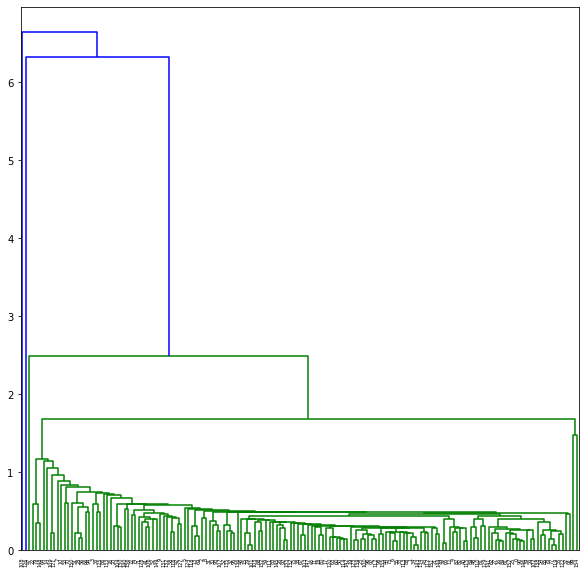

In [143]:
df_clustering = pca_2
fig = plt.figure(figsize = (10,10))
mergings = linkage(df_clustering, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

The results from this clustering are not that clear. Making use of the complete linkage method.

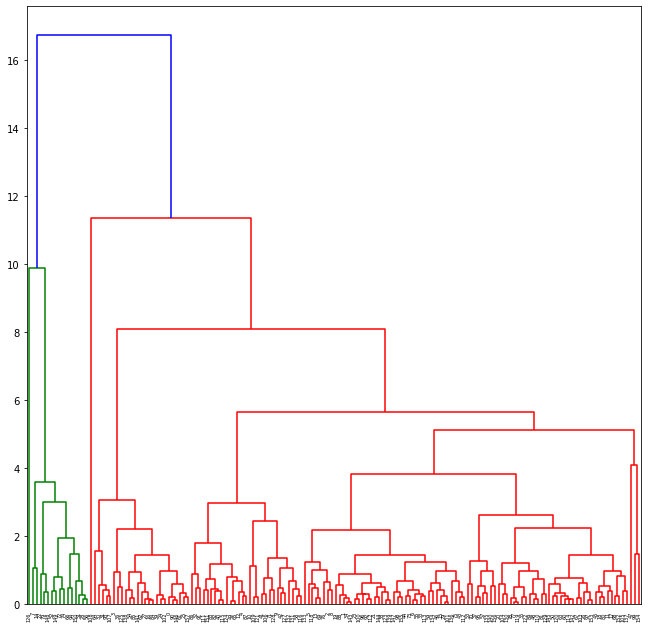

In [144]:
fig = plt.figure(figsize = (11,11))
mergings = linkage(df_clustering, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [183]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
hc = pd.concat([original_data, clusterCut], axis=1)
hc.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']
hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1.0


In [184]:
hc['ClusterID'].value_counts()

1.0    116
0.0     25
2.0     15
4.0      1
3.0      1
Name: ClusterID, dtype: int64

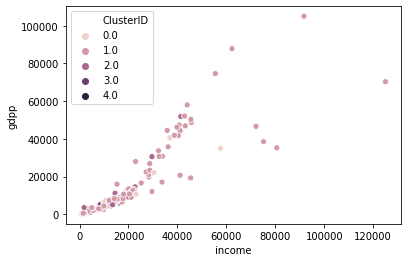

In [185]:
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=hc)

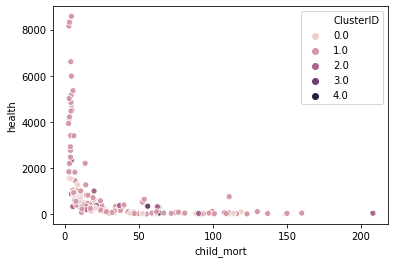

In [186]:
# scatterplot for child mort ,inflation for different cluster ids
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=hc)

In [187]:
hc[hc['ClusterID']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,10276.200,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,2.0
14,Belarus,5.5,3099.420,338.2830,3889.350,16200,15.10,70.4,1.49,6030,2.0
22,Brazil,19.8,1198.400,1009.1200,1321.600,14500,8.41,74.2,1.80,11200,2.0
28,Cameroon,108.0,290.820,67.2030,353.700,2660,1.91,57.3,5.11,1310,2.0
51,Estonia,4.5,10964.600,880.3800,10030.200,22700,1.74,76.0,1.72,14600,2.0
52,Fiji,24.1,2109.700,177.3900,2332.350,7350,4.23,65.3,2.67,3650,2.0
56,Gambia,80.3,133.756,31.9778,239.974,1660,4.30,65.5,5.71,562,2.0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2.0
72,Iraq,36.9,1773.000,378.4500,1534.500,12700,16.60,67.2,4.56,4500,2.0
74,Israel,4.6,10710.000,2334.7800,10067.400,29600,1.77,81.4,3.03,30600,2.0


In [189]:
hc[hc['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610,9.440,56.2,5.82,553,0.0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530,0.0
16,Belize,18.8,2525.88000,225.6800,2495.500000,7880,1.140,71.4,2.71,4340,0.0
24,Bulgaria,10.8,3433.68000,469.9080,3625.200000,15300,1.110,73.9,1.57,6840,0.0
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575,0.0
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.120,66.1,2.88,786,0.0
30,Cape Verde,26.5,1082.37000,135.3790,2045.580000,5830,0.505,72.5,2.67,3310,0.0
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446,0.0
36,Comoros,88.2,126.88500,34.6819,397.573000,1410,3.870,65.9,4.75,769,0.0
39,Costa Rica,10.2,2722.40000,893.8000,2870.000000,13000,6.570,80.4,1.92,8200,0.0


In [193]:
hc[hc['ClusterID']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
126,Rwanda,63.6,67.56,59.115,168.9,1350,2.61,64.6,4.51,563,4.0


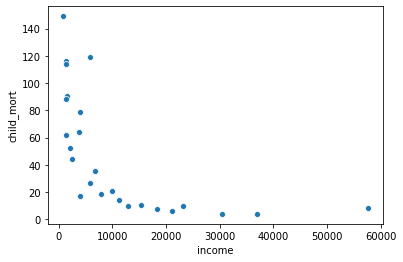

In [191]:
hc_1=hc[hc['ClusterID']==0]
sns.scatterplot(x='income',y='child_mort',data=hc_1)

In [192]:
hc[hc['ClusterID']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
108,Namibia,56.0,2480.82,351.882,3150.33,8460,3.56,58.6,3.6,5190,3.0


We can ignore this cluster as it has only one country. 

Analysing the results from hierarchical clustering, we observe the countries are still not properly clustered here. Hence we will go back to the clusters formed with K-means method, where we saw countried belonging to clusters 2 & 4 might be the one in need of dire aid owing to the following factors:
1. High child mortality rate
2. Lowest income
3. Highest rate of fertility
4. Low expectancy as compared to the countries in other clusters
5. Highest inflation rates
6. Lowest gdpp value (owing to all the above factors)